In [1]:
# cumulative logistic distribution
from H_utility import *
import numpy as np
def logistic_cum(x,mu,sigma):
    y=1./(1+np.exp(-(x-mu)/sigma))
    return y

def H_schedule_smooth(tsec,ON_period,ON_value,OFF_value,**varargindic):
    hr=tsec*1./3600%24
    f1=logistic_cum(hr,varargindic['mu1'],varargindic['sigma1'])*(hr<=mean(ON_period)).astype(int)
    f2=(1-logistic_cum(hr,varargindic['mu2'],varargindic['sigma2']))*(hr>mean(ON_period).astype(int))
    f=f1+f2
    print((hr<=mean(ON_period)).astype(int))
    print((hr>mean(ON_period)).astype(int))
    print((10*f1).astype(int))
    print((10*f2).astype(int))
    print((10*f).astype(int))
    schedule=OFF_value +(ON_value-OFF_value)*f
    return H_iscolumn(schedule),f

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 1 2 5 7 8 9 9 9 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 9 9 9 8 7 5 2 1 0 0 0]
[0 0 0 0 0 1 2 5 7 8 9 9 9 9 9 9 8 7 5 2 1 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 1 2 5 7 8 9 9 9 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 9 9 9 8 7 5 2 1 0 0 0]
[0 0 0 0 0 1 2 5 7 8 9 9 9 9 9 9 8 7 5 2 1 0 0 0]


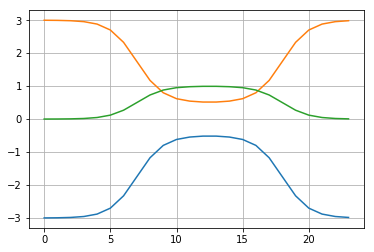

In [2]:
from numpy import *
from matplotlib.pyplot import *
tsec=arange(0,24,step=1)*3600
ON_period=array([7,18])
ON_value=-0.5
OFF_value=-3
(yL,f)=H_schedule_smooth(tsec,ON_period,ON_value,OFF_value,mu1=7,sigma1=1,mu2=18,sigma2=1)
ON_value=0.5
OFF_value=3
(yU,f)=H_schedule_smooth(tsec,ON_period,ON_value,OFF_value,mu1=7,sigma1=1,mu2=18,sigma2=1)
plot(tsec/(3600),yL)
plot(tsec/(3600),yU)
plot(tsec/(3600),f)
grid(True)